<a href="https://colab.research.google.com/github/Fazlibeqir/Timski-Proekt/blob/main/train_v1_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup & Imports

In [ ]:
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 115.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.1 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import torch
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


If locally needs GPU

In [ ]:
# Check GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cuda


## Dataset Check (Optional)
If you want to double-check that your dataset is correctly placed and has the expected files:

/content/drive/MyDrive/Insect Detection/dataset.zip

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
!ls -lh /content/drive/MyDrive/Insect\ Detection/

total 4.2G
-rw------- 1 root root 4.2G May 30 18:02 cleaned_dataset.zip
-rw------- 1 root root  324 May 29 23:17 compare_all_versions.ipynb
-rw------- 1 root root  15K May 30 22:00 fetch_data.ipynb
-rw------- 1 root root  324 May 29 23:17 test_and_eval.ipynb
-rw------- 1 root root 1.6M Jun  3 15:47 train_v1_baseline.ipynb
-rw------- 1 root root  324 May 29 23:16 train_v2_augmented.ipynb
-rw------- 1 root root 1.5M Jun  3 13:01 train_v3_bigger_model.ipynb
drwx------ 2 root root 4.0K May 28 16:56 utils
-rw------- 1 root root 909K May 28 16:44 YOLO8.ipynb


In [ ]:
!cp /content/drive/MyDrive/Insect\ Detection/cleaned_dataset.zip .

In [ ]:
!unzip -q cleaned_dataset.zip -d .

In [ ]:
from pathlib import Path

#dataset is extracted into /content/dataset/content/dataset
base_path = Path("/content/dataset/content/dataset")
for split in ['train','test', 'val']:
    split_path = base_path / split
    image_count = len(list(split_path.rglob('*.jpg')))
    print(f"{split.capitalize()} images: {image_count}")

Train images: 1766
Test images: 384
Val images: 391


## Load and Train the Baseline Model

In [9]:
# Load YOLOv8 baseline
model = YOLO('yolov8s-cls.pt')


# Train the model
model.train(
    data=base_path,
    epochs=100,
    imgsz=224,
    batch=64,
    workers=4,
    patience=10,
    device=0 if torch.cuda.is_available() else 'cpu',
    name='yolov8s-cls_baseline' # This saves under runs/classify/yolov8s-cls_baseline
)

100%|██████████| 12.3M/12.3M [00:00<00:00, 37.8MB/s]


Ultralytics 8.3.148 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=64, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/content/dataset, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8s-cls_baseline, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, plots=True, p

100%|██████████| 5.35M/5.35M [00:00<00:00, 275MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 39.4±25.6 MB/s, size: 427.4 KB)


train: Scanning /content/dataset/content/dataset/train... 3514 images, 0 corrupt: 100%|██████████| 3514/3514 [00:05<00:00, 699.84it/s]

train: New cache created: /content/dataset/content/dataset/train.cache


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1695.4±1703.8 MB/s, size: 1448.8 KB)


val: Scanning /content/dataset/content/dataset/val... 748 images, 0 corrupt: 100%|██████████| 748/748 [00:00<00:00, 3116.00it/s]

val: New cache created: /content/dataset/content/dataset/val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000161, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/yolov8s-cls_baseline
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100      1.34G      4.111         64        224:   4%|▎         | 2/55 [00:12<04:31,  5.12s/it]


100%|██████████| 755k/755k [00:00<00:00, 109MB/s]
      1/100      1.34G      4.073         58        224: 100%|██████████| 55/55 [02:18<00:00,  2.52s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:16<00:00,  2.77s/it]

                   all     0.0307       0.15



      Epoch    GPU_mem       loss  Instances       Size


      2/100      1.69G      3.853         58        224: 100%|██████████| 55/55 [02:06<00:00,  2.30s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:14<00:00,  2.40s/it]

                   all      0.127      0.348



      Epoch    GPU_mem       loss  Instances       Size


      3/100       1.7G      3.491         58        224: 100%|██████████| 55/55 [02:07<00:00,  2.32s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:14<00:00,  2.36s/it]

                   all      0.238      0.552



      Epoch    GPU_mem       loss  Instances       Size


      4/100      1.71G      3.004         58        224: 100%|██████████| 55/55 [02:04<00:00,  2.27s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:10<00:00,  1.76s/it]

                   all      0.307      0.671



      Epoch    GPU_mem       loss  Instances       Size


      5/100      1.72G      2.557         58        224: 100%|██████████| 55/55 [02:02<00:00,  2.23s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:16<00:00,  2.78s/it]

                   all      0.373      0.729



      Epoch    GPU_mem       loss  Instances       Size


      6/100      1.74G      2.206         58        224: 100%|██████████| 55/55 [02:03<00:00,  2.25s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:14<00:00,  2.46s/it]

                   all      0.429      0.773



      Epoch    GPU_mem       loss  Instances       Size


      7/100      1.75G      1.956         58        224: 100%|██████████| 55/55 [02:08<00:00,  2.33s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:11<00:00,  1.94s/it]

                   all       0.46      0.799



      Epoch    GPU_mem       loss  Instances       Size


      8/100      1.76G      1.753         58        224: 100%|██████████| 55/55 [02:06<00:00,  2.29s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:15<00:00,  2.63s/it]

                   all      0.503      0.813



      Epoch    GPU_mem       loss  Instances       Size


      9/100      1.77G      1.588         58        224: 100%|██████████| 55/55 [02:06<00:00,  2.29s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:12<00:00,  2.00s/it]

                   all      0.519      0.829



      Epoch    GPU_mem       loss  Instances       Size


     10/100      1.79G      1.442         58        224: 100%|██████████| 55/55 [02:05<00:00,  2.27s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:13<00:00,  2.33s/it]

                   all      0.541      0.852



      Epoch    GPU_mem       loss  Instances       Size


     11/100       1.8G       1.31         58        224: 100%|██████████| 55/55 [02:04<00:00,  2.27s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:13<00:00,  2.18s/it]

                   all      0.549      0.856



      Epoch    GPU_mem       loss  Instances       Size


     12/100      1.81G      1.197         58        224: 100%|██████████| 55/55 [02:01<00:00,  2.21s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:17<00:00,  2.86s/it]

                   all      0.578      0.868



      Epoch    GPU_mem       loss  Instances       Size


     13/100      1.82G      1.096         58        224: 100%|██████████| 55/55 [02:06<00:00,  2.31s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:14<00:00,  2.42s/it]

                   all      0.567      0.877



      Epoch    GPU_mem       loss  Instances       Size


     14/100      1.83G      1.028         58        224: 100%|██████████| 55/55 [02:06<00:00,  2.31s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:12<00:00,  2.08s/it]

                   all       0.59      0.874



      Epoch    GPU_mem       loss  Instances       Size


     15/100      1.84G     0.9266         58        224: 100%|██████████| 55/55 [02:09<00:00,  2.35s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:12<00:00,  2.14s/it]

                   all      0.607      0.886



      Epoch    GPU_mem       loss  Instances       Size


     16/100      1.86G     0.8761         58        224: 100%|██████████| 55/55 [02:05<00:00,  2.28s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:15<00:00,  2.64s/it]

                   all       0.61      0.898



      Epoch    GPU_mem       loss  Instances       Size


     17/100      1.87G     0.7847         58        224: 100%|██████████| 55/55 [02:05<00:00,  2.29s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:14<00:00,  2.35s/it]

                   all      0.606      0.897



      Epoch    GPU_mem       loss  Instances       Size


     18/100      1.88G     0.7365         58        224: 100%|██████████| 55/55 [02:00<00:00,  2.20s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:15<00:00,  2.62s/it]

                   all      0.622      0.901



      Epoch    GPU_mem       loss  Instances       Size


     19/100      1.89G     0.6887         58        224: 100%|██████████| 55/55 [02:04<00:00,  2.26s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:14<00:00,  2.47s/it]

                   all       0.62      0.902



      Epoch    GPU_mem       loss  Instances       Size


     20/100       1.9G     0.6474         58        224: 100%|██████████| 55/55 [02:04<00:00,  2.26s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:14<00:00,  2.47s/it]

                   all      0.628      0.896



      Epoch    GPU_mem       loss  Instances       Size


     21/100      1.92G     0.6063         58        224: 100%|██████████| 55/55 [02:03<00:00,  2.24s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:16<00:00,  2.76s/it]

                   all      0.635      0.914



      Epoch    GPU_mem       loss  Instances       Size


     22/100      1.93G     0.5505         58        224: 100%|██████████| 55/55 [02:02<00:00,  2.23s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:15<00:00,  2.56s/it]

                   all      0.632      0.914



      Epoch    GPU_mem       loss  Instances       Size


     23/100      1.94G     0.5438         58        224: 100%|██████████| 55/55 [02:04<00:00,  2.26s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:14<00:00,  2.37s/it]

                   all      0.642      0.913



      Epoch    GPU_mem       loss  Instances       Size


     24/100      1.95G     0.4929         58        224: 100%|██████████| 55/55 [02:03<00:00,  2.24s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:14<00:00,  2.46s/it]

                   all      0.627      0.913



      Epoch    GPU_mem       loss  Instances       Size


     25/100      1.96G     0.4632         58        224: 100%|██████████| 55/55 [02:02<00:00,  2.23s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:15<00:00,  2.59s/it]

                   all      0.635      0.916



      Epoch    GPU_mem       loss  Instances       Size


     26/100      1.98G     0.4436         58        224: 100%|██████████| 55/55 [02:04<00:00,  2.26s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:16<00:00,  2.79s/it]

                   all      0.631      0.917



      Epoch    GPU_mem       loss  Instances       Size


     27/100      1.99G     0.4038         58        224: 100%|██████████| 55/55 [02:03<00:00,  2.25s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:13<00:00,  2.25s/it]

                   all      0.638      0.921



      Epoch    GPU_mem       loss  Instances       Size


     28/100         2G     0.4167         58        224: 100%|██████████| 55/55 [02:00<00:00,  2.19s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:16<00:00,  2.76s/it]

                   all      0.656      0.925



      Epoch    GPU_mem       loss  Instances       Size


     29/100      2.01G     0.3825         58        224: 100%|██████████| 55/55 [02:05<00:00,  2.28s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:13<00:00,  2.25s/it]

                   all       0.66      0.918



      Epoch    GPU_mem       loss  Instances       Size


     30/100      2.03G     0.3633         58        224: 100%|██████████| 55/55 [02:07<00:00,  2.32s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:15<00:00,  2.65s/it]

                   all       0.66      0.917



      Epoch    GPU_mem       loss  Instances       Size


     31/100      2.04G     0.3443         58        224: 100%|██████████| 55/55 [02:06<00:00,  2.31s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:15<00:00,  2.55s/it]

                   all      0.648      0.914



      Epoch    GPU_mem       loss  Instances       Size


     32/100      2.05G     0.3424         58        224: 100%|██████████| 55/55 [02:07<00:00,  2.32s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:14<00:00,  2.38s/it]

                   all      0.667       0.92



      Epoch    GPU_mem       loss  Instances       Size


     33/100      2.06G     0.3553         58        224: 100%|██████████| 55/55 [02:00<00:00,  2.19s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:14<00:00,  2.44s/it]

                   all      0.664      0.922



      Epoch    GPU_mem       loss  Instances       Size


     34/100      2.11G     0.3272         58        224: 100%|██████████| 55/55 [02:08<00:00,  2.33s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:13<00:00,  2.29s/it]

                   all      0.664       0.92



      Epoch    GPU_mem       loss  Instances       Size


     35/100      2.12G     0.2878         58        224: 100%|██████████| 55/55 [02:02<00:00,  2.23s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:14<00:00,  2.37s/it]

                   all      0.672      0.918



      Epoch    GPU_mem       loss  Instances       Size


     36/100       2.2G     0.3012         58        224: 100%|██████████| 55/55 [02:06<00:00,  2.31s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:12<00:00,  2.15s/it]

                   all      0.664      0.922



      Epoch    GPU_mem       loss  Instances       Size


     37/100      2.21G     0.2749         58        224: 100%|██████████| 55/55 [02:00<00:00,  2.20s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:15<00:00,  2.55s/it]

                   all      0.664      0.925



      Epoch    GPU_mem       loss  Instances       Size


     38/100      2.22G     0.3045         58        224: 100%|██████████| 55/55 [02:08<00:00,  2.33s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:13<00:00,  2.24s/it]

                   all      0.671      0.922



      Epoch    GPU_mem       loss  Instances       Size


     39/100      2.25G     0.2752         58        224: 100%|██████████| 55/55 [02:03<00:00,  2.24s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:16<00:00,  2.82s/it]

                   all      0.664      0.926



      Epoch    GPU_mem       loss  Instances       Size


     40/100      2.28G     0.2524         58        224: 100%|██████████| 55/55 [02:04<00:00,  2.26s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:15<00:00,  2.59s/it]

                   all      0.656      0.926



      Epoch    GPU_mem       loss  Instances       Size


     41/100      2.31G     0.2561         58        224: 100%|██████████| 55/55 [02:07<00:00,  2.32s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:14<00:00,  2.39s/it]

                   all      0.672      0.925



      Epoch    GPU_mem       loss  Instances       Size


     42/100      2.35G     0.2338         58        224: 100%|██████████| 55/55 [02:04<00:00,  2.26s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:14<00:00,  2.42s/it]

                   all      0.663      0.929



      Epoch    GPU_mem       loss  Instances       Size


     43/100      2.36G     0.2568         58        224: 100%|██████████| 55/55 [02:09<00:00,  2.36s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:12<00:00,  2.14s/it]

                   all      0.656      0.928



      Epoch    GPU_mem       loss  Instances       Size


     44/100       2.4G     0.2513         58        224: 100%|██████████| 55/55 [02:05<00:00,  2.27s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:12<00:00,  2.16s/it]

                   all      0.667      0.928



      Epoch    GPU_mem       loss  Instances       Size


     45/100      2.43G     0.2525         58        224: 100%|██████████| 55/55 [02:07<00:00,  2.32s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:13<00:00,  2.32s/it]

                   all      0.668      0.926



      Epoch    GPU_mem       loss  Instances       Size


     46/100      2.46G     0.2342         58        224: 100%|██████████| 55/55 [02:06<00:00,  2.29s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:12<00:00,  2.09s/it]

                   all      0.671       0.93



      Epoch    GPU_mem       loss  Instances       Size


     47/100       2.5G     0.2232         58        224: 100%|██████████| 55/55 [02:06<00:00,  2.31s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:15<00:00,  2.51s/it]

                   all      0.671      0.922



      Epoch    GPU_mem       loss  Instances       Size


     48/100      2.53G     0.2194         58        224: 100%|██████████| 55/55 [02:05<00:00,  2.29s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:12<00:00,  2.16s/it]

                   all      0.671      0.922



      Epoch    GPU_mem       loss  Instances       Size


     49/100      2.56G     0.2157         58        224: 100%|██████████| 55/55 [02:08<00:00,  2.34s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:13<00:00,  2.30s/it]

                   all      0.676      0.924



      Epoch    GPU_mem       loss  Instances       Size


     50/100      2.57G     0.2187         58        224: 100%|██████████| 55/55 [02:02<00:00,  2.23s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:15<00:00,  2.65s/it]

                   all      0.678      0.922



      Epoch    GPU_mem       loss  Instances       Size


     51/100      2.63G     0.2196         58        224: 100%|██████████| 55/55 [02:02<00:00,  2.22s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:15<00:00,  2.54s/it]

                   all      0.679      0.922



      Epoch    GPU_mem       loss  Instances       Size


     52/100      2.64G     0.2143         58        224: 100%|██████████| 55/55 [02:06<00:00,  2.30s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:11<00:00,  1.95s/it]

                   all      0.671      0.918



      Epoch    GPU_mem       loss  Instances       Size


     53/100      2.67G     0.2032         58        224: 100%|██████████| 55/55 [02:05<00:00,  2.29s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:13<00:00,  2.29s/it]

                   all      0.679      0.929



      Epoch    GPU_mem       loss  Instances       Size


     54/100       2.7G     0.2114         58        224: 100%|██████████| 55/55 [02:06<00:00,  2.30s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:16<00:00,  2.71s/it]

                   all      0.676      0.932



      Epoch    GPU_mem       loss  Instances       Size


     55/100      2.73G     0.1924         58        224: 100%|██████████| 55/55 [02:02<00:00,  2.22s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:14<00:00,  2.44s/it]

                   all      0.689      0.925



      Epoch    GPU_mem       loss  Instances       Size


     56/100      2.77G     0.1787         58        224: 100%|██████████| 55/55 [02:03<00:00,  2.25s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:15<00:00,  2.65s/it]

                   all      0.689      0.928



      Epoch    GPU_mem       loss  Instances       Size


     57/100       2.8G      0.183         58        224: 100%|██████████| 55/55 [02:04<00:00,  2.27s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:14<00:00,  2.48s/it]

                   all       0.69      0.926



      Epoch    GPU_mem       loss  Instances       Size


     58/100      2.83G     0.1855         58        224: 100%|██████████| 55/55 [02:01<00:00,  2.22s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:13<00:00,  2.31s/it]

                   all      0.701      0.922



      Epoch    GPU_mem       loss  Instances       Size


     59/100      2.84G     0.1835         58        224: 100%|██████████| 55/55 [02:01<00:00,  2.22s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:15<00:00,  2.59s/it]

                   all      0.702      0.922



      Epoch    GPU_mem       loss  Instances       Size


     60/100       2.9G     0.1732         58        224: 100%|██████████| 55/55 [02:03<00:00,  2.24s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:13<00:00,  2.21s/it]

                   all      0.701      0.928



      Epoch    GPU_mem       loss  Instances       Size


     61/100      2.91G     0.1741         58        224: 100%|██████████| 55/55 [02:01<00:00,  2.20s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:16<00:00,  2.69s/it]

                   all      0.695      0.926



      Epoch    GPU_mem       loss  Instances       Size


     62/100      2.94G     0.1667         58        224: 100%|██████████| 55/55 [02:04<00:00,  2.27s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:14<00:00,  2.39s/it]

                   all      0.682      0.921



      Epoch    GPU_mem       loss  Instances       Size


     63/100      2.97G     0.1752         58        224: 100%|██████████| 55/55 [02:07<00:00,  2.33s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:14<00:00,  2.48s/it]

                   all      0.686      0.922



      Epoch    GPU_mem       loss  Instances       Size


     64/100         3G     0.1514         58        224: 100%|██████████| 55/55 [02:07<00:00,  2.31s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:15<00:00,  2.53s/it]

                   all       0.69      0.922



      Epoch    GPU_mem       loss  Instances       Size


     65/100      3.04G     0.1731         58        224: 100%|██████████| 55/55 [02:05<00:00,  2.28s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:12<00:00,  2.08s/it]

                   all      0.684      0.925



      Epoch    GPU_mem       loss  Instances       Size


     66/100      3.07G     0.1617         58        224: 100%|██████████| 55/55 [02:07<00:00,  2.32s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:12<00:00,  2.04s/it]

                   all      0.686      0.917



      Epoch    GPU_mem       loss  Instances       Size


     67/100       3.1G     0.1694         58        224: 100%|██████████| 55/55 [01:59<00:00,  2.17s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:14<00:00,  2.37s/it]

                   all      0.693      0.914



      Epoch    GPU_mem       loss  Instances       Size


     68/100      3.13G     0.1575         58        224: 100%|██████████| 55/55 [02:05<00:00,  2.29s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:12<00:00,  2.14s/it]

                   all      0.695      0.917



      Epoch    GPU_mem       loss  Instances       Size


     69/100      3.16G     0.1604         58        224: 100%|██████████| 55/55 [02:03<00:00,  2.24s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:16<00:00,  2.70s/it]

                   all      0.684      0.917



      Epoch    GPU_mem       loss  Instances       Size


     70/100      3.17G     0.1444         58        224: 100%|██████████| 55/55 [02:04<00:00,  2.25s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:13<00:00,  2.25s/it]

                   all      0.695      0.918
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 60, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



70 epochs completed in 2.725 hours.
Optimizer stripped from runs/classify/yolov8s-cls_baseline/weights/last.pt, 10.4MB
Optimizer stripped from runs/classify/yolov8s-cls_baseline/weights/best.pt, 10.4MB

Validating runs/classify/yolov8s-cls_baseline/weights/best.pt...
Ultralytics 8.3.148 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-cls summary (fused): 30 layers, 5,149,498 parameters, 0 gradients, 12.5 GFLOPs
train: /content/dataset/content/dataset/train... found 3514 images in 58 classes ✅ 
ERROR ❌ val: /content/dataset/content/dataset/val... found 748 images in 57 classes (requires 58 classes, not 57)
ERROR ❌ test: /content/dataset/content/dataset/test... found 748 images in 57 classes (requires 58 classes, not 57)


               classes   top1_acc   top5_acc:  33%|███▎      | 2/6 [00:07<00:12,  3.24s/it]


  0%|          | 0.00/22.2M [00:00<?, ?B/s]
100%|██████████| 22.2M/22.2M [00:00<00:00, 161MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:25<00:00,  4.30s/it]


                   all      0.701      0.928
Speed: 0.1ms preprocess, 0.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/yolov8s-cls_baseline


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79d44431bcd0>
curves: []
curves_results: []
fitness: 0.8141711354255676
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.7005347609519958, 'metrics/accuracy_top5': 0.9278075098991394, 'fitness': 0.8141711354255676}
save_dir: PosixPath('runs/classify/yolov8s-cls_baseline')
speed: {'preprocess': 0.08273987967740709, 'inference': 0.3581849278053076, 'loss': 0.00011132486539028765, 'postprocess': 0.00024014304914663642}
task: 'classify'
top1: 0.7005347609519958
top5: 0.9278075098991394

## View Results (Optional)

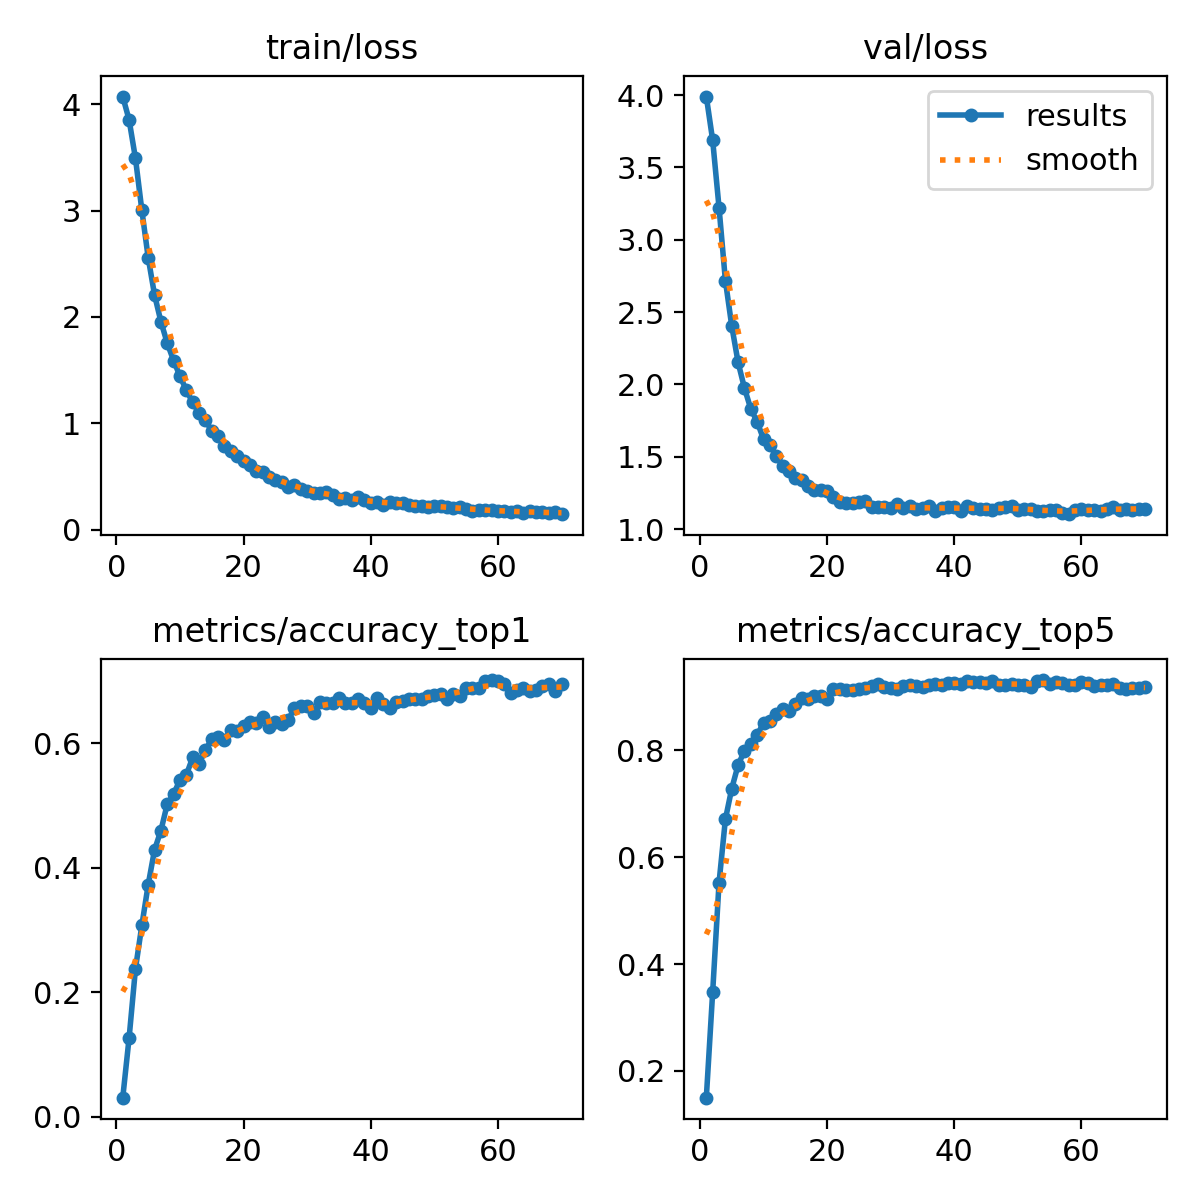

In [10]:
# After training, check results
from IPython.display import Image, display
results_dir = Path("runs/classify/yolov8s-cls_baseline")
display(Image(filename=results_dir / "results.png"))

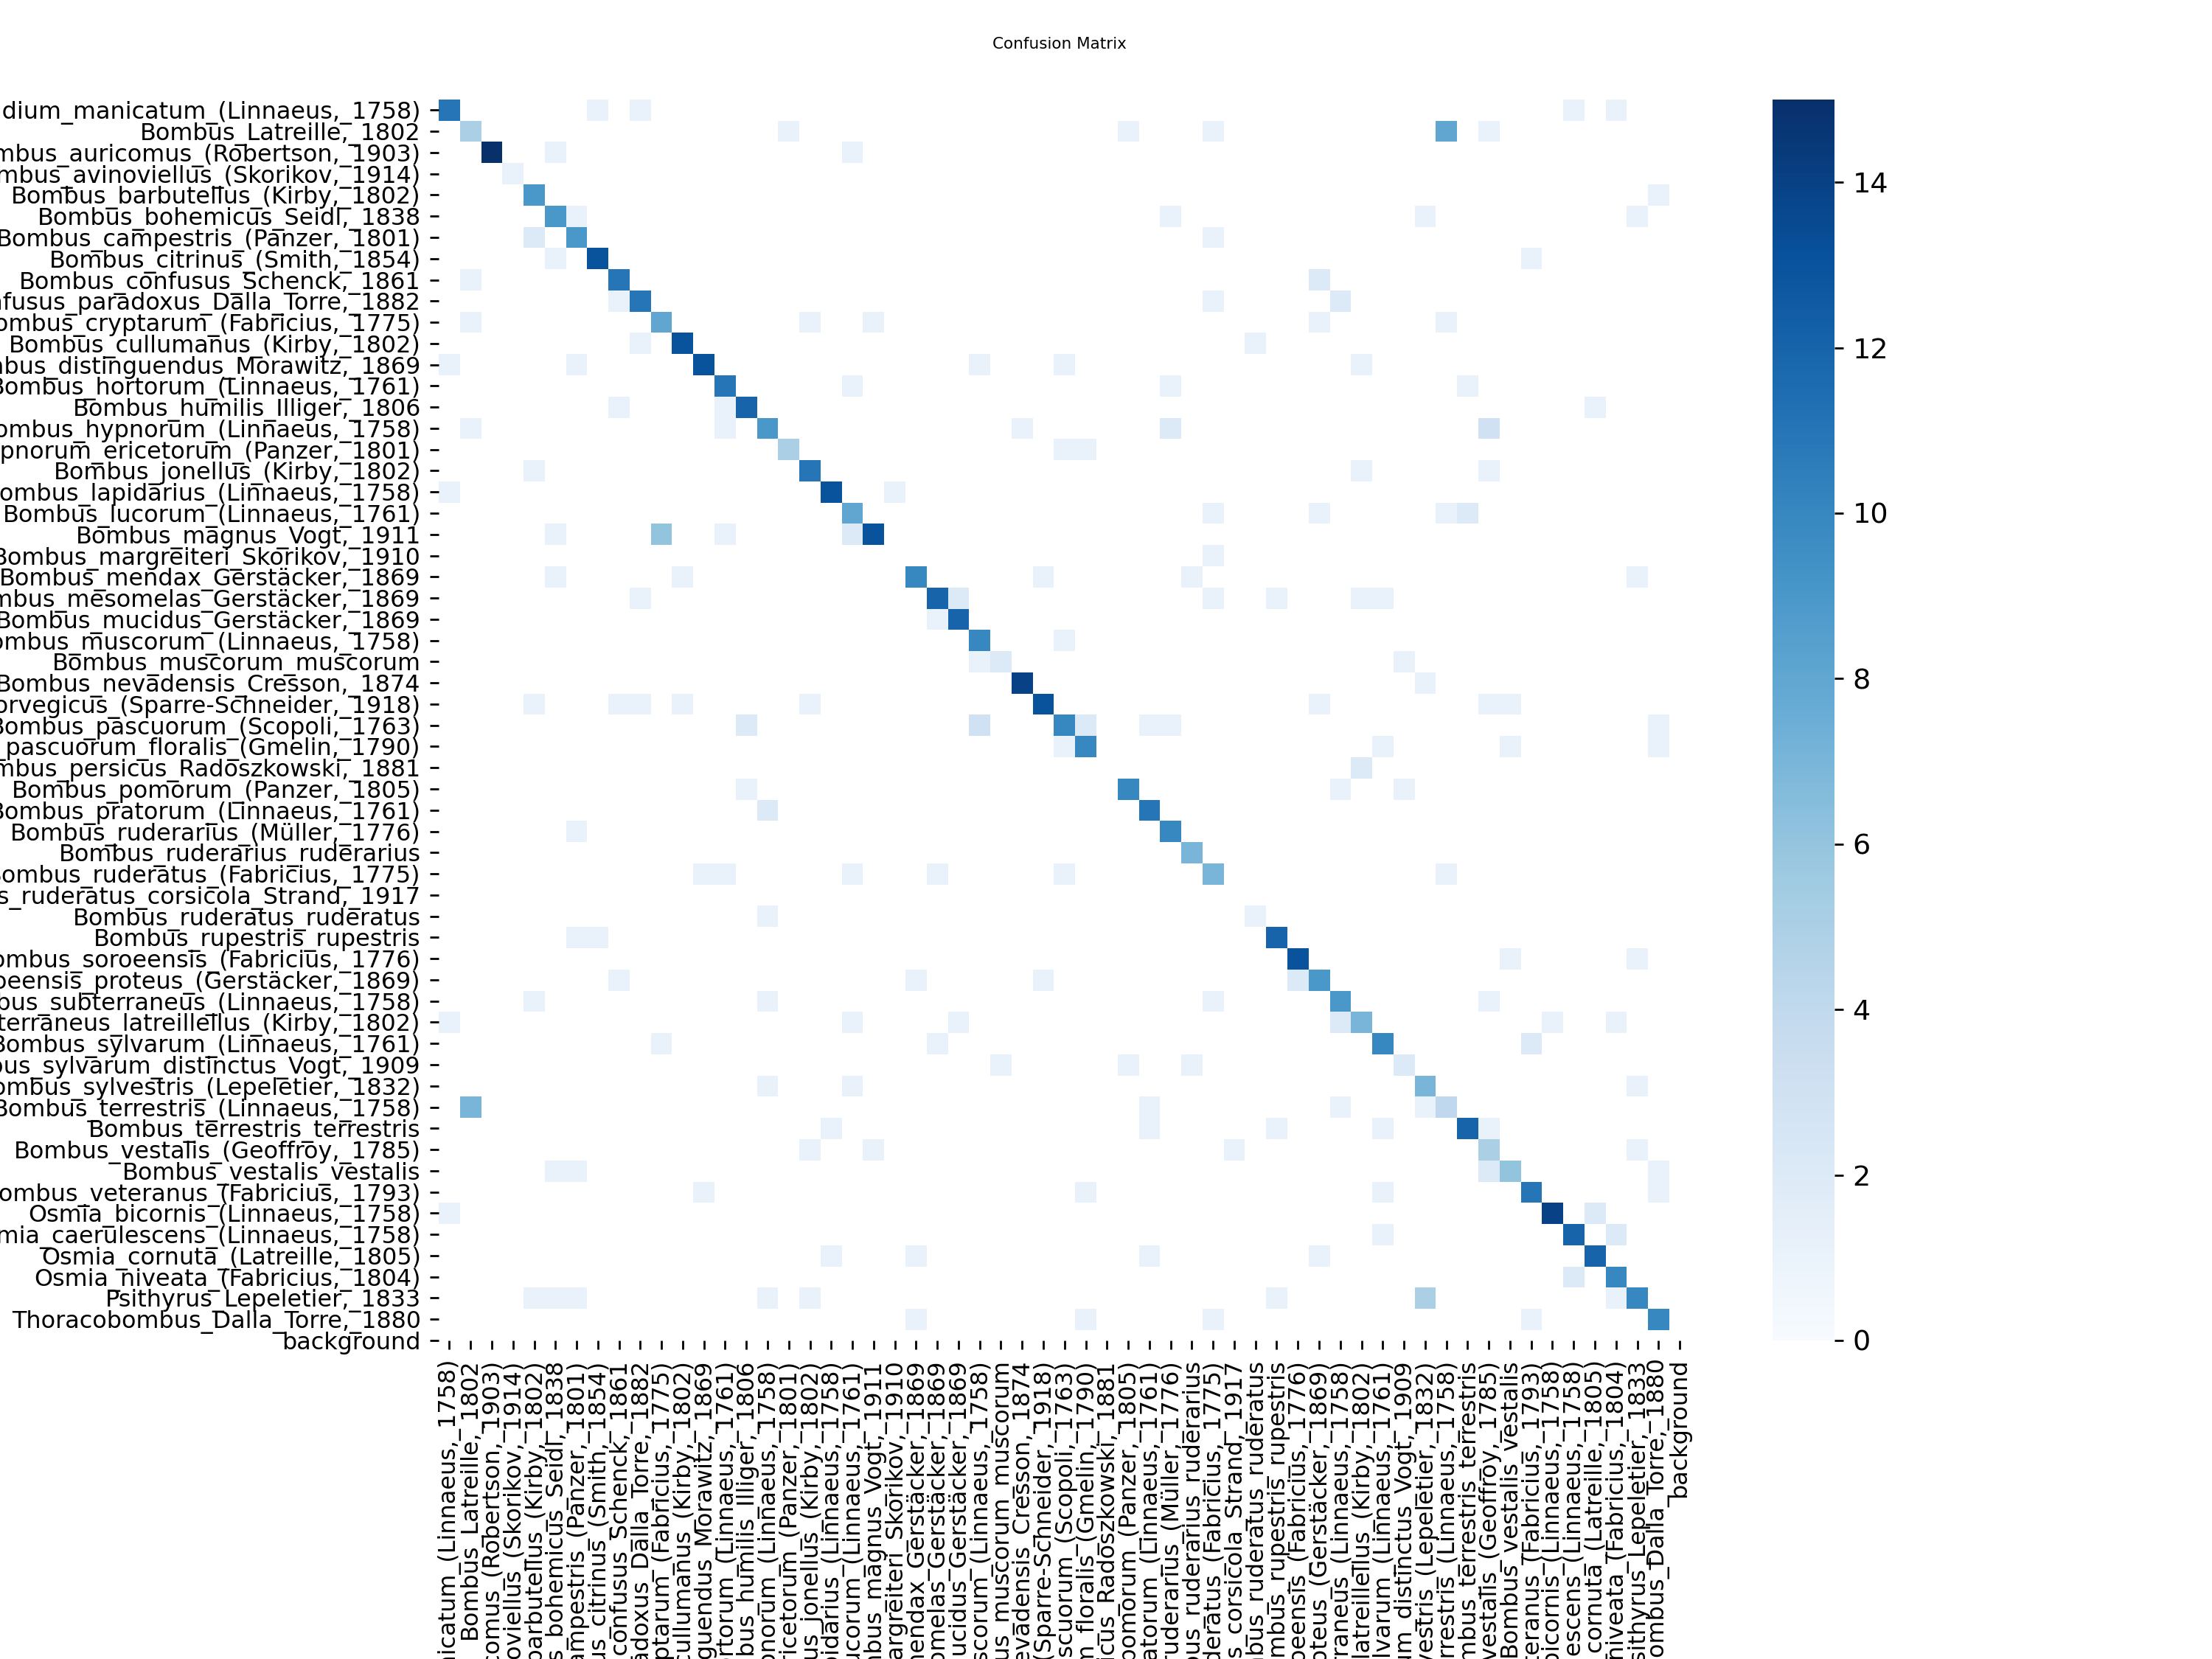

In [11]:
display(Image(filename=results_dir / "confusion_matrix.png"))